Default RF (10 trees) Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Best Accuracy: 1.0 using 1 trees
Best Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


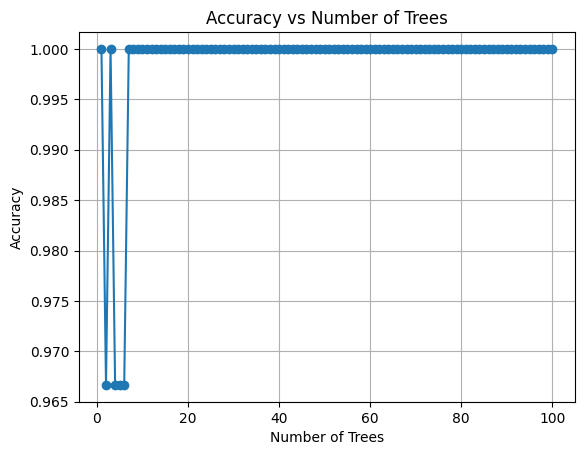

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/iris (2).csv")  # Adjust filename if needed

# Prepare data
X = df.drop(columns=["species"])  # Assuming 'species' is the target column
y = df["species"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Default Random Forest with 10 trees
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)

print(f"Default RF (10 trees) Accuracy: {acc_default}")
print("Confusion Matrix:\n", conf_matrix_default)

# Try different numbers of trees to find the best
best_acc = 0
best_n = 10
acc_list = []

for n in range(1, 101):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append((n, acc))
    if acc > best_acc:
        best_acc = acc
        best_n = n
        best_conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nBest Accuracy: {best_acc} using {best_n} trees")
print("Best Confusion Matrix:\n", best_conf_matrix)

# Plot accuracy vs number of trees
x_vals, y_vals = zip(*acc_list)
plt.plot(x_vals, y_vals, marker='o')
plt.title("Accuracy vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
